In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm
from sklearn.linear_model import LinearRegression 
import time 
import math

In [2]:
data = pd.read_csv('./datasets/data.csv')
data_gen = pd.read_csv('./datasets/data_w_genres.csv')

In [3]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
data_gen.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [5]:
data.info

<bound method DataFrame.info of         valence  year  acousticness  \
0        0.0594  1921       0.98200   
1        0.9630  1921       0.73200   
2        0.0394  1921       0.96100   
3        0.1650  1921       0.96700   
4        0.2530  1921       0.95700   
...         ...   ...           ...   
170648   0.6080  2020       0.08460   
170649   0.7340  2020       0.20600   
170650   0.6370  2020       0.10100   
170651   0.1950  2020       0.00998   
170652   0.6420  2020       0.13200   

                                                  artists  danceability  \
0       ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                          ['Dennis Day']         0.819   
2       ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                        ['Frank Parker']         0.275   
4                                          ['Phil Regan']         0.418   
...                                              

In [6]:
data.shape

(170653, 19)

In [7]:
data.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

In [8]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

<AxesSubplot:>

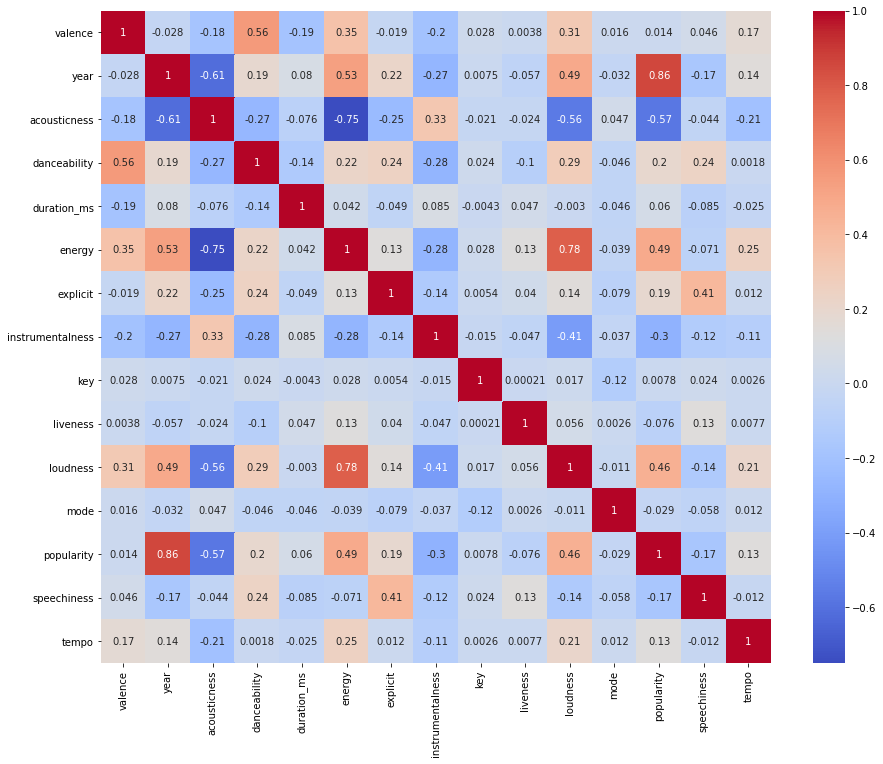

In [9]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm')

popularity vs year
loudness vs energy
danacibility vs valance

Text(0, 0.5, ' ')

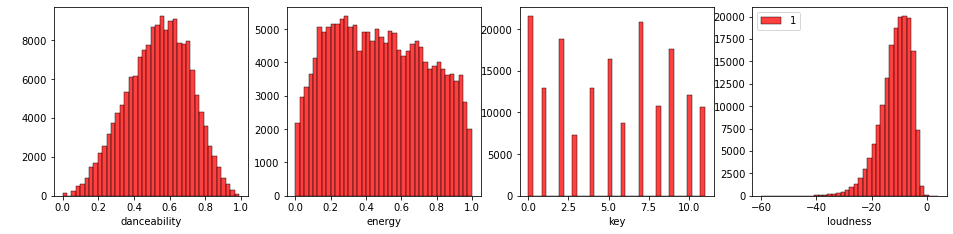

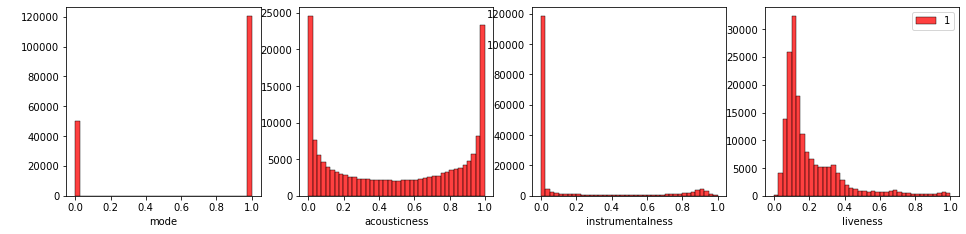

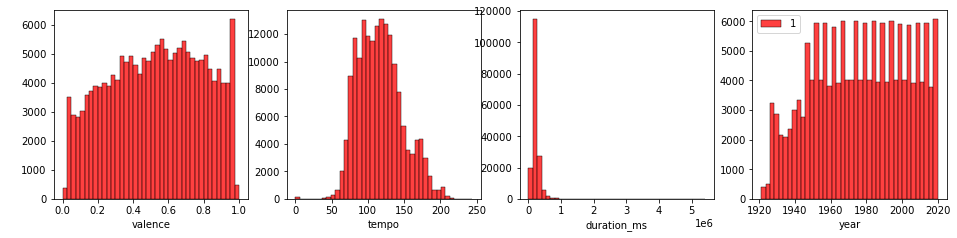

In [10]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.histplot(data['danceability'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,2)
sns.histplot(data['energy'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,3)
sns.histplot(data['key'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,4)
sns.histplot(data['loudness'], color='red', bins=40)
plt.legend((1,0))
plt.ylabel(" ")

plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.histplot(data['mode'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,2)
sns.histplot(data['acousticness'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,3)
sns.histplot(data['instrumentalness'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,4)
sns.histplot(data['liveness'], color='red', bins=40)
plt.legend((1,0))
plt.ylabel(" ")


plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.histplot(data['valence'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,2)
sns.histplot(data['tempo'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,3)
sns.histplot(data['duration_ms'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,4)
sns.histplot(data['year'], color='red', bins=40)
plt.legend((1,0))
plt.ylabel(" ")

Text(0.5, 0, 'Year')

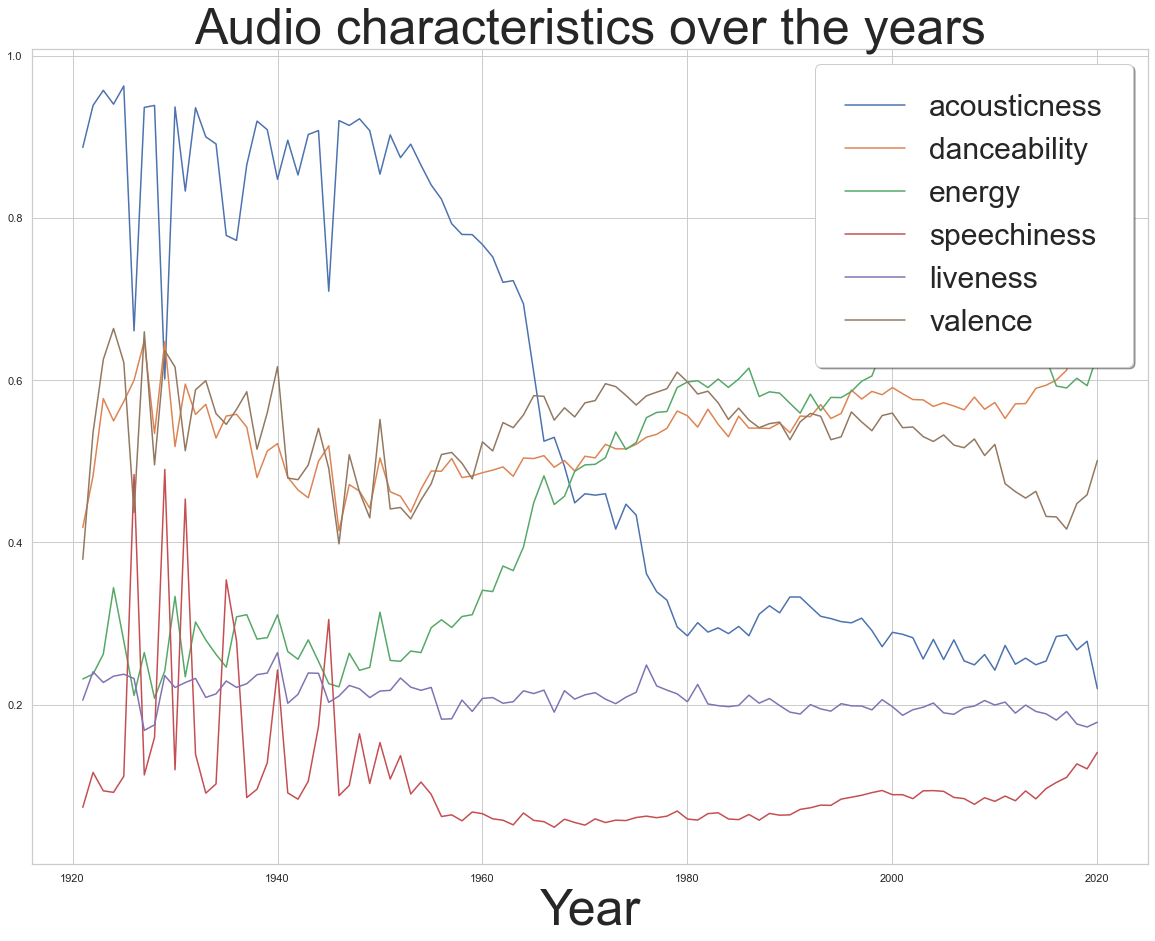

In [15]:
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over the years', fontsize = 50)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 30}, loc = 'upper right')
ax.set_ylabel('', fontsize = 50)
ax.set_xlabel('Year', fontsize = 50)

Text(0.5, 0, 'Year')

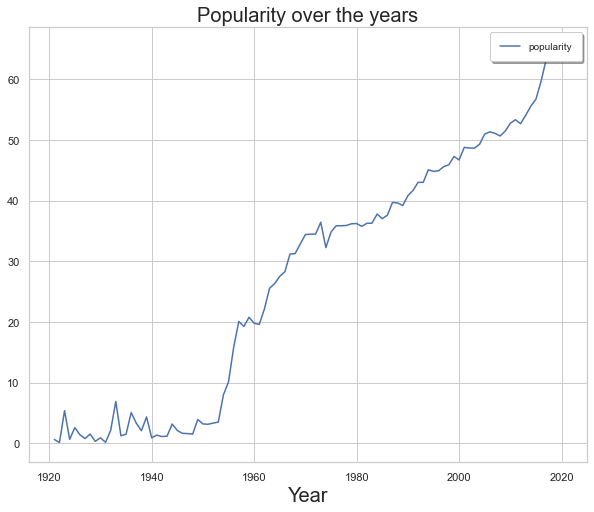

In [21]:
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
columns = ["popularity"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Popularity over the years', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 10}, loc = 'upper right')
ax.set_ylabel('', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)

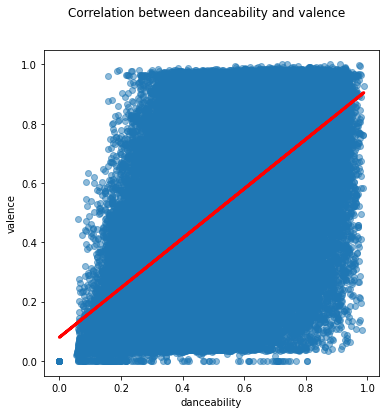

In [21]:
x1 = data["danceability"].values
y1 = data["valence"].values

x1 = x1.reshape(x1.shape[0], 1)
y1 = y1.reshape(y1.shape[0], 1)

regr = LinearRegression()
regr.fit(x1, y1)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and valence")

ax = plt.subplot(1, 1, 1)
ax.scatter(x1, y1, alpha=0.5)
ax.plot(x1, regr.predict(x1), color="red", linewidth=3)

plt.xlabel("danceability")
plt.ylabel("valence")

plt.show()


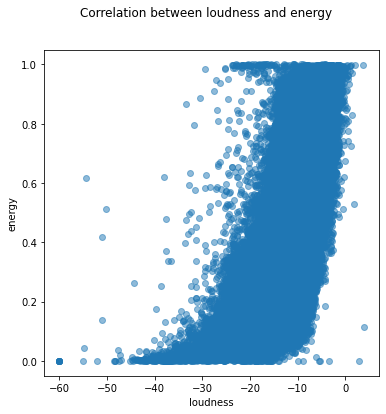

In [22]:
x2 = data["loudness"].values
y2 = data["energy"].values

x2 = x2.reshape(x2.shape[0], 1)
y2 = y2.reshape(y2.shape[0], 1)

regr = LinearRegression()
regr.fit(x2, y2)

fig2 = plt.figure(figsize=(6, 6))
fig2.suptitle("Correlation between loudness and energy")

ax2 = plt.subplot(1, 1, 1)
ax2.scatter(x2, y2, alpha=0.5)


plt.xlabel("loudness")
plt.ylabel("energy")

plt.show()